<h3 style="color: #ecfaf4; font-size: 24px;">Project Purpose and Key Concepts</h3>

<p style="color: #16a085; font-size: 16px;">
  This project is a Retrieval-Augmented Generation (RAG) system that combines document retrieval with advanced language generation to answer complex questions accurately and efficiently.
</p>

<h4 style="color: #ecfaf4; font-size: 20px;">What is Retrieval-Augmented Generation (RAG)?</h4>
<p style="color: #16a085; font-size: 16px;">
  Retrieval-Augmented Generation (RAG) is an approach that integrates <span style="color: #bb1c51;">retrieval</span> and <span style="color: #bb1c51;">generation</span> in a unified pipeline. When a complex question is asked:
</p>
<ul style="color: #16a085; font-size: 16px;">
  <li>
    The system <strong>retrieves</strong> relevant passages from a large reference corpus (e.g., Wikipedia articles) by converting text into embeddings and performing similarity searches.
  </li>
  <li>
    It then uses a language model to <strong>generate</strong> a coherent and concise answer based on both the question and the retrieved context.
  </li>
</ul>

<h4 style="color: #ecfaf4; font-size: 20px;">How is FAISS Used?</h4>
<p style="color: #16a085; font-size: 16px;">
  FAISS (Facebook AI Similarity Search) is a critical component of the retrieval part of the system. Once the text from our documents is transformed into high-dimensional vectors using the <span style="color: #bb1c51;">SentenceFeatureExtractor</span>, FAISS enables fast and efficient similarity searches. This allows the system to quickly identify the most relevant text segments that relate to the user's query, ensuring that the generated answer is grounded in actual, contextually appropriate information.
</p>

<h4 style="color: #ecfaf4; font-size: 20px;">Why Create a Subquestion System?</h4>
<p style="color: #16a085; font-size: 16px;">
  Complex queries often cover multiple topics or require nuanced answers. The subquestion system breaks down these complex queries into simpler, manageable parts. This has several benefits:
</p>
<ul style="color: #16a085; font-size: 16px;">
  <li>
    It <strong>isolates specific aspects</strong> of the query, making it easier to retrieve precise information from the reference documents.
  </li>
  <li>
    It enables the use of <span style="color: #bb1c51;">different retrieval strategies</span>—for example, using vector retrieval for factual data and summarization for broader context.
  </li>
  <li>
    The system then <strong>aggregates</strong> these focused subanswers into a final comprehensive answer, leading to more accurate and reliable results.
  </li>
</ul>

<h4 style="color: #ecfaf4; font-size: 20px;">Document Reference</h4>
<p style="color: #16a085; font-size: 16px;">
  The core of this project is built around a collection of Wikipedia articles about major cities such as <span style="color: #bb1c51;">Toronto</span>, <span style="color: #bb1c51;">Chicago</span>, <span style="color: #bb1c51;">Houston</span>, <span style="color: #bb1c51;">Boston</span>, and <span style="color: #bb1c51;">Atlanta</span>. These articles serve as the reference documents from which relevant information is retrieved. By leveraging a trusted and widely-used source like Wikipedia, the system ensures that its answers are both factual and verifiable.
</p>


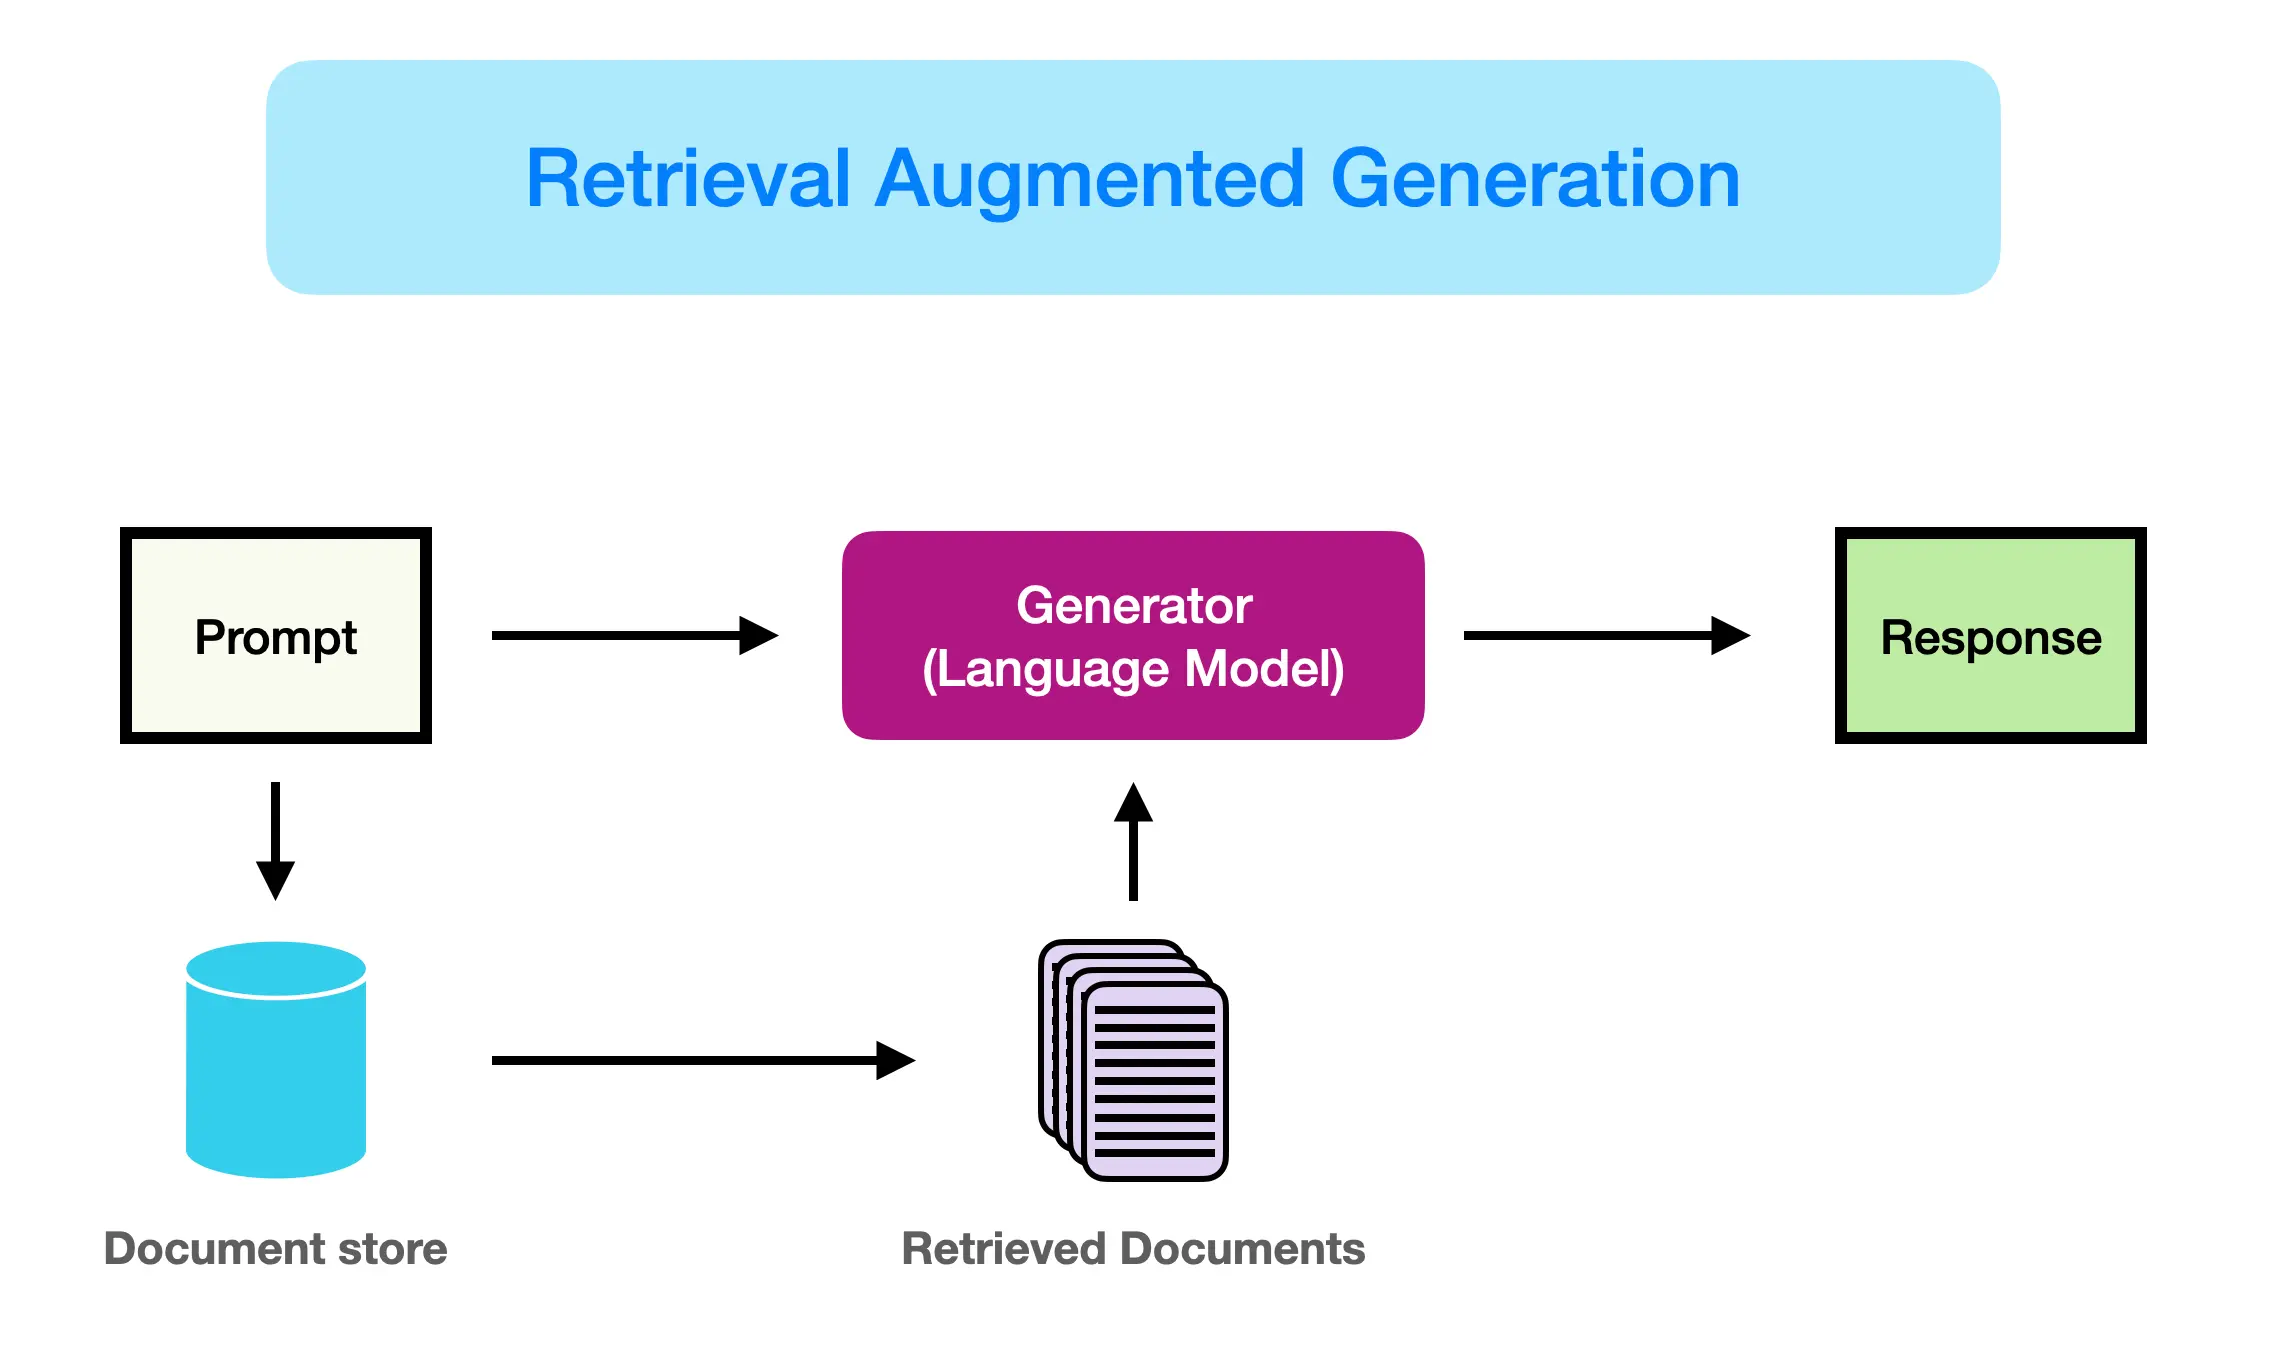

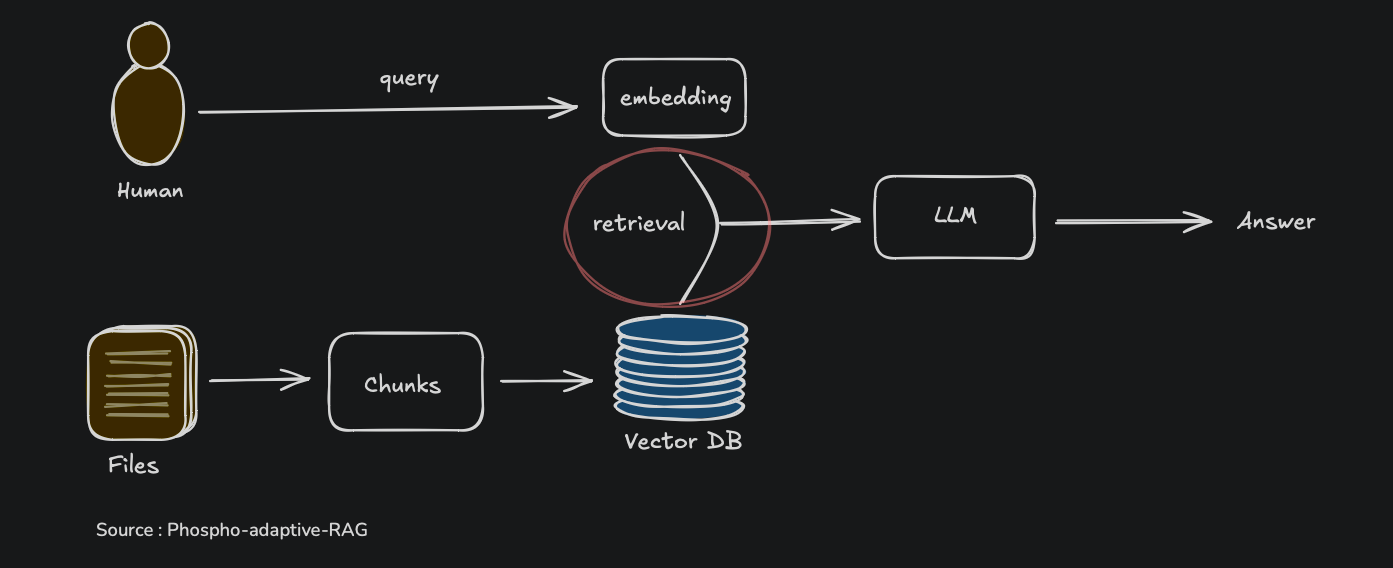

# References for documents: 

<p style="color: #16a085; font-size: 16px;">
  You can find a good reference explanation about <strong>FAISS</strong> 
  <a href="https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/" style="color: #0078D4; font-size: 16px;" target="_blank">here</a>.
</p>
<p style="color: #16a085; font-size: 16px;">
  You can find a good reference explanation about <strong>RAG (Retrieval-Augmented Generation)</strong> 
  <a href="https://arxiv.org/abs/2005.11401" style="color: #0078D4; font-size: 16px;" target="_blank">here</a>.
</p>


# Installing the required libraries: 

In [8]:
pip install evadb dotenv

  Using cached pydantic-1.10.21-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (153 kB)
Using cached pydantic-1.10.21-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires pydantic>=2.7.0, but you have pydantic 1.10.21 which is incompatible.
google-genai 0.2.2 requires pydantic<3.0.0dev,>=2.0.0, but you have pydantic 1.10.21 which is incompatible.
instructor 1.7.2 requires pydantic<3.0.0,>=2.8.0, but you have pydantic 1.10.21 which is incompatible.
langchain 0.3.19 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.21 which is incompatible.
langchain-core 0.3.40 requires pydantic<

In [9]:
pip install nbimporter

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -U langchain-community

  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
Using cached pydantic-2.10.6-py3-none-any.whl (431 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.21
    Uninstalling pydantic-1.10.21:
      Successfully uninstalled pydantic-1.10.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evadb 0.3.9 requires pydantic<2, but you have pydantic 2.10.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade pydantic

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install instructor

Note: you may need to restart the kernel to use updated packages.


# Importing the libraries: 

In [14]:
import os
import re
import json
from dotenv import load_dotenv
from enum import Enum
from pathlib import Path
import requests
import warnings
from typing import List
import faiss
from instructor import OpenAISchema
from pydantic import Field, create_model
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import evadb
from kaggle_secrets import UserSecretsClient
import google.generativeai as genai
from shutil import copyfile
warnings.filterwarnings("ignore")


# Starting to create QA System 

## Creating Subquestion generator: 

<h3 style="color: #ecfaf4; font-size: 24px;">What Should We Learn from the Subquestion Generator Function?</h3>

<ol>
    <li style="color: #16a085; font-size: 16px;">
        The <strong>subquestion generator</strong> is responsible for breaking a complex question into smaller, manageable parts. This helps in tackling multifaceted queries by allowing the system to focus on one aspect at a time.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It uses a few-shot learning approach, which means it provides the language model with <span style="color: #bb1c51;">examples</span> of how to decompose similar questions. These examples guide the model to output structured JSON that conforms to a specific schema.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The function dynamically creates <span style="color: #bb1c51;">Pydantic</span> models to validate the JSON output. This ensures that each subquestion contains all necessary fields like <span style="color: #bb1c51;">question</span>, <span style="color: #bb1c51;">function</span>, and <span style="color: #bb1c51;">file_name</span>.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It also enforces a constraint on <span style="color: #bb1c51;">file_name</span> values by dynamically generating an enumeration from a given list of document names. This restricts the model to output only allowed names, ensuring consistency across the system.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        Finally, the output is parsed from JSON into validated Python objects, which the main QA system uses to route each subquestion to the correct retrieval method (such as <span style="color: #bb1c51;">vector_retrieval</span> or <span style="color: #bb1c51;">llm_retrieval</span>).
    </li>
</ol>

<p style="font-size: 16px; color: #16a085;">
    In summary, the subquestion generator function leverages few-shot learning, dynamic model creation with <span style="color: #bb1c51;">Pydantic</span>, and strict input constraints to robustly decompose complex queries into actionable subcomponents.
</p>


In [41]:
# DEFAULT_SUBQUESTION_GENERATOR_PROMPT = """
#                  You are an AI agent that takes a complex user question and returns a list of simple subquestions to answer the user's question.
#                  You are provided a set of functions and data sources that you can use to answer each subquestion.
#                  If the user question is simple, just return the user question, the function, and the data source to use.
#                  You can only use the provided functions and data sources.
#                  The subquestions should be complete questions that can be answered by a single function and a single data source.
#                  """

# DEFAULT_SUBQUESTION_GENERATOR_PROMPT = """
#     You are an AI assistant that specializes in breaking down complex questions into simpler, manageable sub-questions.
#     When presented with a complex user question, your role is to generate a list of sub-questions that, when answered, will comprehensively address the original query.
#     You have at your disposal a pre-defined set of functions and data sources to utilize in answering each sub-question.
#     If a user question is straightforward, your task is to return the original question, identifying the appropriate function and data source to use for its solution.
#     Please remember that you are limited to the provided functions and data sources, and that each sub-question should be a full question that can be answered using a single function and a single data source.
# """

DEFAULT_SUBQUESTION_GENERATOR_PROMPT = """
    You are an AI assistant that specializes in breaking down complex questions into simpler, manageable sub-questions.
    You have at your disposal a pre-defined set of functions and files to utilize in answering each sub-question.
    Please remember that your output should only contain the provided function names and file names, and that each sub-question should be a full question that can be answered using a single function and a single file.
"""

DEFAULT_USER_TASK = ""


class FunctionEnum(str, Enum):
    """The function to use to answer the questions.
    Use vector_retrieval for fact-based questions such as demographics, sports, arts and culture, etc.
    Use llm_retrieval for summarization questions, such as positive aspects, history, etc.
    """
    VECTOR_RETRIEVAL = "vector_retrieval"
    LLM_RETRIEVAL = "llm_retrieval"

def generate_subquestions(
    question,
    file_names: List[str] = None,
    system_prompt=DEFAULT_SUBQUESTION_GENERATOR_PROMPT,
    user_task=DEFAULT_USER_TASK,
    llm_model="gemini-1.5-flash",
):
    """
    Generates a list of subquestions from a user question along with the file name and the function
    to use to answer the question using Google's Gemini API via free_llm_call.
    """
    # Dynamically create an Enum for file names.
    FilenameEnum = Enum("FilenameEnum", {x.upper(): x for x in file_names})
    FilenameEnum.__doc__ = f"The names of the file to use to answer the corresponding subquestion - e.g. {file_names[0]}"

    # Dynamically create a Pydantic model for a question bundle.
    QuestionBundle = create_model(
        "QuestionBundle",
        question=(str, Field(None, description="The subquestion extracted from the user's question")),
        function=(FunctionEnum, Field(None)),
        file_name=(FilenameEnum, Field(None)),
    )

    # Create a Pydantic model for the overall subquestion bundle list.
    SubQuestionBundleList = create_model(
        "SubQuestionBundleList",
        subquestion_bundle_list=(
            List[QuestionBundle],
            Field(None, description="A list of subquestions - each item in the list contains a question, a function, and a file name"),
        ),
        __base__=OpenAISchema,
    )

    # Construct the user prompt with the user task and question.
    user_prompt = f"{user_task}\nHere is the user question: {question}\n"
    # Append few-shot examples.
    few_shot_examples = [
        {
            "role": "user",
            "content": "Compare the population of Atlanta and Toronto?",
        },
        {
            "role": "function",
            "name": "SubQuestionBundleList",
            "content": """
            {
                "subquestion_bundle_list": [
                    {
                        "question": "What is the population of Atlanta?",
                        "function": "vector_retrieval",
                        "file_name": "Atlanta"
                    },
                    {
                        "question": "What is the population of Toronto?",
                        "function": "vector_retrieval",
                        "file_name": "Toronto"
                    }
                ]
            }"""
        },
        {
            "role": "user",
            "content": "Summarize the history of Chicago and Houston.",
        },
        {
            "role": "function",
            "name": "SubQuestionBundleList",
            "content": """
            {
                "subquestion_bundle_list": [
                    {
                        "question": "What is the history of Chicago?",
                        "function": "llm_retrieval",
                        "file_name": "Chicago"
                    },
                    {
                        "question": "What is the history of Houston?",
                        "function": "llm_retrieval",
                        "file_name": "Houston"
                    }
                ]
            }"""
        }
    ]
    user_prompt += "\nFew-shot examples:\n" + json.dumps(few_shot_examples, indent=2)
    user_prompt += "\nPlease output your answer as valid JSON. Ensure that the 'file_name' field is one of the following exactly: 'Toronto', 'Chicago', 'Houston', 'Boston', 'Atlanta'."


    # Call the free_llm_call function to generate the subquestions.
    response = free_llm_call(
        model=llm_model,
        system_prompt=system_prompt,
        user_prompt=user_prompt,
    )

    print("Raw response from model:", response)

    # Parse the response as JSON.
    try:
        subquestions_dict = json.loads(response)
    except json.JSONDecodeError as e:
        print("JSON decoding failed. Response was:", response)
        raise e

    # Extract the subquestion bundle list from the parsed dictionary.
    subquestions_list = subquestions_dict["subquestion_bundle_list"]

    # Validate and convert using the Pydantic model.
    subquestions_pydantic_obj = SubQuestionBundleList(subquestion_bundle_list=subquestions_list)
    return subquestions_pydantic_obj.subquestion_bundle_list


In [26]:
    if not load_dotenv():
        print("Could not load .env file or it is empty. Please check if it exists and is readable.")
        exit(1)

Could not load .env file or it is empty. Please check if it exists and is readable.


## Setting up the Gemini API: 

In [27]:
GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

## Response creation for final output and subquestions: 

<h3 style="color: #ecfaf4; font-size: 24px;">What Should We Learn from the free_llm_call Function?</h3>

<ol>
  <li style="color: #16a085; font-size: 16px;">
    The <strong>free_llm_call</strong> function serves as an interface to Google's <span style="color: #bb1c51;">Gemini API</span> via the <span style="color: #bb1c51;">google.generativeai</span> library. Its purpose is to generate text responses based on a prompt.
  </li>
  <li style="color: #16a085; font-size: 16px;">
    It accepts parameters such as <span style="color: #bb1c51;">model</span>, <span style="color: #bb1c51;">user_prompt</span>, and an optional <span style="color: #bb1c51;">system_prompt</span>. The function combines these prompts into a single <span style="color: #bb1c51;">full_prompt</span> that guides the generation process.
  </li>
  <li style="color: #16a085; font-size: 16px;">
    Internally, the function creates an instance of the <span style="color: #bb1c51;">GenerativeModel</span> (using the given model identifier, e.g., <span style="color: #bb1c51;">"gemini-1.5-flash"</span>) and calls its <span style="color: #bb1c51;">generate_content</span> method with the <span style="color: #bb1c51;">full_prompt</span>.
  </li>
  <li style="color: #16a085; font-size: 16px;">
    The response from <span style="color: #bb1c51;">generate_content</span> is assumed to contain the generated text within its <span style="color: #bb1c51;">.text</span> attribute. The function then extracts this text and returns it as the final answer.
  </li>
  <li style="color: #16a085; font-size: 16px;">
    By removing any cost tracking, the design stays focused on producing a text output efficiently. This makes it ideal for a free project where the emphasis is on functionality rather than resource monitoring.
  </li>
</ol>

<p style="font-size: 16px; color: #16a085;">
  In summary, <strong>free_llm_call</strong> abstracts the process of making a call to the <span style="color: #bb1c51;">Gemini API</span> by handling prompt construction, API invocation through <span style="color: #bb1c51;">GenerativeModel</span>, and output extraction via <span style="color: #bb1c51;">generate_content</span>. This encapsulation simplifies the integration of language generation into the broader QA system.
</p>


In [28]:
def free_llm_call(model, user_prompt, system_prompt=None):
    """
    Calls Google's Gemini API via google.generativeai to generate text.
    
    Parameters:
      - model: The identifier for the Gemini model (e.g., "models/gemini").
      - user_prompt: The main prompt text.
      - system_prompt: Optional additional instructions to prepend.
      
    Returns:
      - A tuple (answer, cost), where cost is 0.0 for free usage.
    """

    # Combine system prompt and user prompt if provided.
    full_prompt = f"{system_prompt}\n{user_prompt}" if system_prompt else user_prompt

    # Create an instance of the Gemini GenerativeModel.
    gemini_model = genai.GenerativeModel(model)
    
    # Generate content using the model.
    response = gemini_model.generate_content(full_prompt)
    
    # Extract and return the generated text.
    answer = response.text
    return answer

## Creating a vector database using evaDB: 

<h3 style="color: #ecfaf4; font-size: 24px;">What Should We Learn from the vector_retrieval Function and generate_vector_stores?</h3>

<ol>
    <li style="color: #16a085; font-size: 16px;">
        The <strong>vector_retrieval</strong> function is designed to answer a fact-based question by searching through a vector store. It queries the database for the most semantically similar text snippets related to the question.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It uses a SQL-like query on a table (named <span style="color: #bb1c51;">{doc_name}_features</span>) where each row contains both the original text (<span style="color: #bb1c51;">data</span>) and its corresponding embedding (<span style="color: #bb1c51;">features</span>).
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The query orders the results by the similarity between the question’s embedding (computed using the <span style="color: #bb1c51;">SentenceFeatureExtractor</span> UDF) and the stored embeddings, retrieving the top three matches.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The function then concatenates the retrieved text segments to form a unified context. This context is used to construct a prompt that includes clear instructions, the original question, and the relevant text.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        Finally, the prompt is passed to the <span style="color: #bb1c51;">free_llm_call</span> function (which interfaces with the Gemini API) to generate the final answer.
    </li>
</ol>

<p style="font-size: 16px; color: #16a085;">
    In summary, <strong>vector_retrieval</strong> combines database querying for relevant text with language generation. It leverages the power of vector embeddings to identify context and then uses the <span style="color: #bb1c51;">Gemini API</span> (via <span style="color: #bb1c51;">free_llm_call</span>) to produce a concise answer.
</p>


In [19]:
def generate_vector_stores(cursor,docs): 
    for doc in docs:
        print(f"Creating vector store for {doc}...")
        cursor.query(f"DROP TABLE IF EXISTS {doc};").df()
        cursor.query(f"LOAD DOCUMENT 'data/{doc}.txt' INTO {doc};").df()
        evadb_path = os.path.dirname(evadb.__file__)
        cursor.query(
            f"""CREATE FUNCTION IF NOT EXISTS SentenceFeatureExtractor
            IMPL  '{evadb_path}/functions/sentence_feature_extractor.py';
            """).df()

        cursor.query(
            f"""CREATE TABLE IF NOT EXISTS {doc}_features AS
            SELECT SentenceFeatureExtractor(data), data FROM {doc};"""
        ).df()

        cursor.query(
            f"CREATE INDEX IF NOT EXISTS {doc}_index ON {doc}_features (features) USING FAISS;"
        ).df()
        print(f"Successfully created vector store for {doc}.")

In [44]:
def vector_retrieval(cursor, llm_model, question, doc_name):
    """Returns the answer to a factoid question using vector retrieval."""
    res_batch = cursor.query(
        f"""SELECT data FROM {doc_name}_features
        ORDER BY Similarity(SentenceFeatureExtractor('{question}'),features)
        LIMIT 3;"""
    ).df()
    context_list = []
    for i in range(len(res_batch)):
        context_list.append(res_batch["data"][i])
    context = "\n".join(context_list)
    user_prompt = f"""You are an assistant for question-answering tasks.
                Use the following pieces of retrieved context to answer the question.
                If you don't know the answer, just say that you don't know.
                Use three sentences maximum and keep the answer concise.
                Question: {question}
                Context: {context}
                Answer:"""

    response = free_llm_call(model=llm_model, user_prompt=user_prompt)
    return response

## Document summarization:

<h3 style="color: #ecfaf4; font-size: 24px;">What Should We Learn from the summary_retrieval Function?</h3>

<ol>
    <li style="color: #16a085; font-size: 16px;">
        The <strong>summary_retrieval</strong> function is designed to answer a question by summarizing a provided document excerpt. It is especially useful when a fact-based retrieval isn’t enough and a holistic summary of the content is needed.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It takes in three key inputs: the model identifier (<span style="color: #bb1c51;">llm_model</span>), the user’s <span style="color: #bb1c51;">question</span>, and a <span style="color: #bb1c51;">document excerpt</span> (<em>doc</em>) that serves as context.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The function constructs a clear prompt that instructs the model to use <strong>only</strong> the provided context to answer the question. This helps ensure that the generated answer is directly based on the given information.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        Once the prompt is ready, it calls the <span style="color: #bb1c51;">free_llm_call</span> function to interact with the <span style="color: #bb1c51;">Gemini API</span> and generate a response.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The final answer, generated as a plain text string by the Gemini API, is returned by the function for further use in the overall question-answering system.
    </li>
</ol>

<p style="font-size: 16px; color: #16a085;">
    In essence, <strong>summary_retrieval</strong> provides a simple yet powerful way to generate answers based on large text excerpts, ensuring that the response is concise and rooted in the provided context.
</p>


In [21]:
def summary_retrieval(llm_model, question, doc):
    """Returns the answer to a summarization question over the document using summary retrieval."""
    user_prompt = f"""Here is some context: {doc}
Use only the provided context to answer the question.
Here is the question: {question}"""
    answer = free_llm_call(model=llm_model, user_prompt=user_prompt)
    return answer

## Combining the outputs:

<h3 style="color: #ecfaf4; font-size: 24px;">What Should We Learn from the response_aggregator Function?</h3>

<ol>
    <li style="color: #16a085; font-size: 16px;">
        The <strong>response_aggregator</strong> function is designed to combine the individual answers obtained from subquestions into a single, coherent final answer. It ensures that the overall response to the original complex query is clear and concise.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It aggregates multiple subanswers by concatenating them—each separated by a newline—to form a unified context. This unified context gathers all the relevant details extracted from various parts of the document.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The function then constructs a final prompt that includes the original question along with the aggregated context. This prompt provides clear instructions for generating a final answer.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        It calls the <span style="color: #bb1c51;">free_llm_call</span> function (which interfaces with the <span style="color: #bb1c51;">Gemini API</span>) using this final prompt, thereby synthesizing the individual responses into one final answer.
    </li>
    <li style="color: #16a085; font-size: 16px;">
        The final answer is then returned as a plain text string, ready to be presented as the response to the user’s original query.
    </li>
</ol>

<p style="font-size: 16px; color: #16a085;">
    In summary, <strong>response_aggregator</strong> effectively synthesizes the diverse information retrieved from subquestions into a single, concise final answer by leveraging the generative capabilities of the Gemini API through <span style="color: #bb1c51;">free_llm_call</span>.
</p>


In [22]:
def response_aggregator(llm_model, question, responses):
    """Aggregates the responses from the subquestions to generate the final response."""
    print("-------> ⭐ Aggregating responses...")
    system_prompt = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use three sentences maximum and keep the answer concise."""
    context = "\n".join(responses)
    user_prompt = f"Question: {question}\nContext: {context}\nAnswer:"
    answer = free_llm_call(model=llm_model, system_prompt=system_prompt, user_prompt=user_prompt)
    return answer

## Loading the documents from Wikipedia using Wiki api: 

In [23]:
def load_wiki_pages(page_titles=["Toronto", "Chicago", "Houston", "Boston", "Atlanta"]):
    for title in page_titles:
        response = requests.get(
            "https://en.wikipedia.org/w/api.php",
            params={
                "action": "query",
                "format": "json",
                "titles": title,
                "prop": "extracts",
                "explaintext": True,
            },
        ).json()
        page = next(iter(response["query"]["pages"].values()))
        wiki_text = page["extract"]
        data_path = Path("data")
        if not data_path.exists():
            Path.mkdir(data_path)
        with open(data_path / f"{title}.txt", "w", encoding="utf-8") as fp:
            fp.write(wiki_text)
    city_docs = {}
    for wiki_title in page_titles:
        input_text = open(f"data/{wiki_title}.txt", "r", encoding="utf-8").read()
        city_docs[wiki_title] = input_text[:10000]
    return city_docs


## Implementing the database and getting ready for input prompts: 

In [45]:
if __name__ == "__main__":
    print("⏳ Connect to EvaDB...")
    cursor = evadb.connect().cursor()
    print("✅ Connected to EvaDB...")

    doc_names = ["Toronto", "Chicago", "Houston", "Boston", "Atlanta"]
    wiki_docs = load_wiki_pages(page_titles=doc_names)

    user_task = """We have a database of Wikipedia articles about several cities.
We are building an application to answer questions about the cities."""
    
    # Build vector stores for all documents.
    generate_vector_stores(cursor, wiki_docs)

    # Set the model identifier for Gemini; adjust if needed.
    llm_model = "gemini-1.5-flash"
    
    while True:
        question = input("Question (enter 'exit' to exit): ")
        if question.lower() == "exit":
            break
        
        print("🧠 Generating subquestions...")
        # Generate subquestions; ignore any cost returned.
        subquestions_bundle_list = generate_subquestions(
            question=question,
            file_names=doc_names,
            user_task=user_task,
            llm_model=llm_model,
        )
        
        responses = []
        for q_no, item in enumerate(subquestions_bundle_list):
            subquestion = item.question
            selected_func = item.function.value
            selected_doc = item.file_name.value
            print(f"\n-------> 🤔 Processing subquestion #{q_no+1}: {subquestion} | function: {selected_func} | data source: {selected_doc}")
            
            if selected_func == "vector_retrieval":
                response = vector_retrieval(cursor, llm_model, subquestion, selected_doc)
            elif selected_func == "llm_retrieval":
                response = summary_retrieval(llm_model, subquestion, wiki_docs[selected_doc])
            else:
                print(f"\nCould not process subquestion: {subquestion} function: {selected_func} data source: {selected_doc}\n")
                exit(0)
            
            print(f"✅ Response #{q_no+1}: {response}")
            responses.append(response)
        
        aggregated_response = response_aggregator(llm_model, question, responses)
        print(f"\n✅ Final response: {aggregated_response}")


⏳ Connect to EvaDB...
✅ Connected to EvaDB...
Creating vector store for Toronto...


03-04-2025 11:59:08 WARNING[executor_utils:executor_utils.py:handle_if_not_exists:0094] Table: Toronto_features already exists
03-04-2025 11:59:08 WARNING[create_index_executor:create_index_executor.py:_create_evadb_index:0119] Index Toronto_index already exists. It will be updated on existing table.


Successfully created vector store for Toronto.
Creating vector store for Chicago...


03-04-2025 11:59:08 WARNING[executor_utils:executor_utils.py:handle_if_not_exists:0094] Table: Chicago_features already exists
03-04-2025 11:59:09 WARNING[create_index_executor:create_index_executor.py:_create_evadb_index:0119] Index Chicago_index already exists. It will be updated on existing table.


Successfully created vector store for Chicago.
Creating vector store for Houston...


03-04-2025 11:59:09 WARNING[executor_utils:executor_utils.py:handle_if_not_exists:0094] Table: Houston_features already exists
03-04-2025 11:59:09 WARNING[create_index_executor:create_index_executor.py:_create_evadb_index:0119] Index Houston_index already exists. It will be updated on existing table.


Successfully created vector store for Houston.
Creating vector store for Boston...


03-04-2025 11:59:09 WARNING[executor_utils:executor_utils.py:handle_if_not_exists:0094] Table: Boston_features already exists
03-04-2025 11:59:09 WARNING[create_index_executor:create_index_executor.py:_create_evadb_index:0119] Index Boston_index already exists. It will be updated on existing table.


Successfully created vector store for Boston.
Creating vector store for Atlanta...


03-04-2025 11:59:11 WARNING[executor_utils:executor_utils.py:handle_if_not_exists:0094] Table: Atlanta_features already exists
03-04-2025 11:59:11 WARNING[create_index_executor:create_index_executor.py:_create_evadb_index:0119] Index Atlanta_index already exists. It will be updated on existing table.


Successfully created vector store for Atlanta.


Question (enter 'exit' to exit):  capital of canada ? 


🧠 Generating subquestions...
Raw response from model: {"subquestion_bundle_list": [{"question": "What is the capital of Canada?", "function": "vector_retrieval", "file_name": "Toronto"}]}

-------> 🤔 Processing subquestion #1: What is the capital of Canada? | function: vector_retrieval | data source: Toronto


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Response #1: {"answer": "I'm sorry, but this document does not contain the answer to what the capital of Canada is."}
-------> ⭐ Aggregating responses...

✅ Final response: {"answer": "I don't know."}


Question (enter 'exit' to exit):  What is the history of Chicago?


🧠 Generating subquestions...
Raw response from model: {"subquestion_bundle_list": [{"question": "What is the history of Chicago?", "function": "llm_retrieval", "file_name": "Chicago"}]}

-------> 🤔 Processing subquestion #1: What is the history of Chicago? | function: llm_retrieval | data source: Chicago
✅ Response #1: {"history": {"beginnings": "In the mid-18th century, the area was inhabited by the Potawatomi tribe. The first known permanent settler was Jean Baptiste Point du Sable, who established a settlement in the 1780s. In 1795, an area that was to be part of Chicago was given to the U.S. for a military post. In 1803, the U.S. Army constructed Fort Dearborn, which was destroyed in 1812 and later rebuilt. After the War of 1812, more land was ceded to the U.S., and the Potawatomi were forcibly removed in 1833.", "19thCentury": "On August 12, 1833, the Town of Chicago was organized. By 1837, it was incorporated as a city and grew rapidly. Its location on the Chicago Portage made it

Question (enter 'exit' to exit):  What is the capital of canada ? 


🧠 Generating subquestions...
Raw response from model: {"subquestion_bundle_list": [{"question": "What is the capital of Canada?", "function": "vector_retrieval", "file_name": "Toronto"}]}

-------> 🤔 Processing subquestion #1: What is the capital of Canada? | function: vector_retrieval | data source: Toronto


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Response #1: {"answer": "I am sorry, but this document does not contain the answer to what the capital of Canada is."}
-------> ⭐ Aggregating responses...

✅ Final response: {"answer": "I don't know."}


Question (enter 'exit' to exit):  What is the population of toronto?


🧠 Generating subquestions...
Raw response from model: {"subquestion_bundle_list": [{"question": "What is the population of Toronto?", "function": "vector_retrieval", "file_name": "Toronto"}]}

-------> 🤔 Processing subquestion #1: What is the population of Toronto? | function: vector_retrieval | data source: Toronto


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Response #1: {"answer": "In 2021, Toronto's population was 2,794,356.  This represents a 2.3% increase from the 2016 population. The population density was 4,427.8 per square kilometer."}
-------> ⭐ Aggregating responses...

✅ Final response: {"answer": "In 2021, Toronto's population was 2,794,356. This is a 2.3% increase from 2016. The population density was 4,427.8 per square kilometer."}


Question (enter 'exit' to exit):  exit


# Appreciation

<h3 style="color: #ecfaf4; font-size: 24px;">Acknowledgements and Appreciation</h3>

<p style="color: #16a085; font-size: 16px;">
  The main reference for this project is available on GitHub 
  <a href="https://github.com/pchunduri6/rag-demystified/tree/main" style="color: #0078D4; font-size: 16px;" target="_blank">here</a>.
</p>

<p style="color: #16a085; font-size: 16px;">
  Originally, the implementation made use of a premium API. However, I wanted the project to be completely free to use, so I implemented several changes to replace the premium components with free alternatives.
</p>

<p style="color: #16a085; font-size: 16px;">
  Thank you for taking the time to explore this project. If you have any questions, please feel free to leave a comment or email me at 
  <a href="mailto:Shahbods26@gmail.com" style="color: #0078D4; font-size: 16px;">Shahbods26@gmail.com</a>.
</p>
